In [1]:
import pandas as pd
import numpy as np

In [2]:
data_loc = '34_25.csv'

In [5]:
data = pd.read_csv(data_loc, header=None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,13.255663,-3.970881,2.796957,-6.344109,24.017276,-18.697087,21.128203,-18.501314,-0.839574,-16.191357
1,-26.357436,7.110444,16.870685,4.426741,15.145726,17.248351,-12.547473,17.486641,-9.131461,-20.452525
2,-3.576196,-18.649942,24.643430,-14.978293,-9.286028,8.377791,4.414909,-12.870903,15.586781,-0.174785
3,-23.203200,8.301919,16.095409,7.643220,16.914143,16.649280,-8.603661,16.012082,-11.373881,-21.142902
4,9.998677,-0.640020,2.602077,-4.334787,22.336607,-23.446092,20.818255,-17.437508,-0.637234,-16.413384


In [23]:
data[1]

0     -3.970881
1      7.110444
2    -18.649942
3      8.301919
4     -0.640020
5      1.437521
6     14.204532
7    -20.094752
8     13.470127
9      6.255525
10    14.553828
11     6.137878
12     0.245302
13   -21.213137
14   -17.437630
15     2.099883
16    14.811178
17     7.658285
18   -21.094703
19   -20.273633
20    -0.167307
21    13.859602
22     0.044463
23     7.571001
24     0.522759
25    -5.521551
26    -1.473552
27     6.005504
28    12.076744
29    -1.433010
30    -1.141593
31    14.328752
32    -1.687116
33    12.783884
34     2.094364
35     0.098099
36    13.403332
37    -2.494283
38     7.780300
39   -18.838246
40    -4.225510
41   -20.256720
42     1.463263
43   -20.199372
44   -19.632787
45    -3.474568
46     1.416401
47     6.200663
48     0.734177
49    -0.402466
50    12.525219
51    13.681152
52     6.969372
53     6.814284
54   -19.178982
55     0.284519
56     7.898680
57    12.625640
58    -1.794941
59   -19.996677
Name: 1, dtype: float64

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components = 10)

In [26]:
data_transformed = pca.fit_transform(data)

In [27]:
explained_variance = pca.explained_variance_ratio_

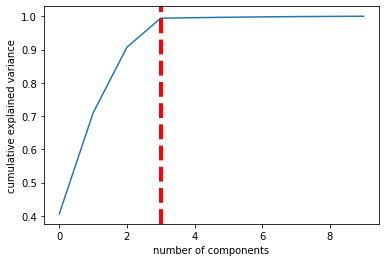

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.406044,0.406044
1,0.709562,0.303518
2,0.906962,0.197401
3,0.994111,0.087149
4,0.995633,0.001522
5,0.996978,0.001344
6,0.998064,0.001086
7,0.998887,0.000824
8,0.999493,0.000605
9,1.000000,0.000507


In [41]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=3, ymin=0, ymax=1)
display(plt.show())
evr = explained_variance
cvr = np.cumsum(explained_variance)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [43]:
pca = PCA(n_components = 3)
data_transformed = pca.fit_transform(data)

In [44]:
data_transformed

array([[-34.78385542, -22.59549992, -24.60224271],
       [ 12.65462903,  30.34120785,  -0.72985724],
       [-10.86457445, -20.62457524,  31.25443017],
       [ 10.6242521 ,  29.65375074,  -5.38752278],
       [-33.9262402 , -20.67442681, -26.80019335],
       [-17.06771031,  28.64975227,   3.77765539],
       [ 51.37507454, -16.70522789, -10.62636391],
       [ -8.10479142, -22.38014373,  35.63407916],
       [ 45.83407404, -14.01387413,  -9.93392701],
       [  8.85269441,  29.26619983,  -1.10035419],
       [ 50.135796  , -14.34876135, -11.61893089],
       [ 11.52591182,  28.8455728 ,   0.63218085],
       [-14.32973052,  28.92882176,   2.45817609],
       [ -7.32200673, -23.67253794,  35.08521534],
       [ -7.84504591, -22.52841942,  32.25173069],
       [-17.77144854,  30.89893748,   4.37646746],
       [ 48.23321962, -13.13982203, -11.75139189],
       [ 10.70064365,  29.08144968,  -2.52605504],
       [ -7.81842006, -23.38527825,  33.70863991],
       [ -7.7070086 , -23.48130

In [45]:
explained_variance

array([0.40604393, 0.30351786, 0.19740068, 0.08714896, 0.00152204,
       0.0013443 , 0.00108602, 0.00082359, 0.0006053 , 0.00050732])

In [46]:
cvr

array([0.40604393, 0.7095618 , 0.90696248, 0.99411144, 0.99563347,
       0.99697778, 0.99806379, 0.99888738, 0.99949268, 1.        ])

In [47]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

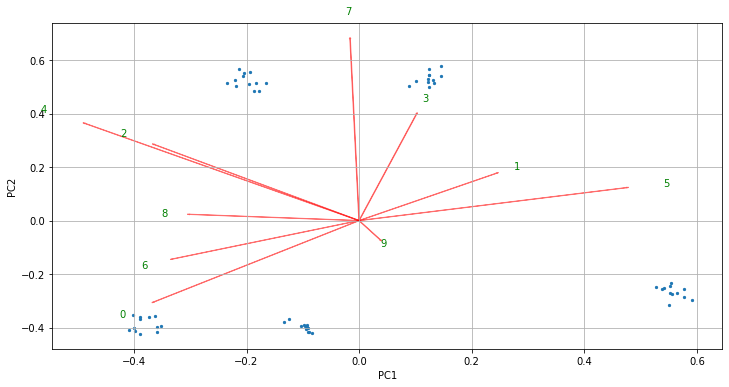

In [52]:
plt.figure(figsize=(12, 6))
biplot(data_transformed, np.transpose(pca.components_), [0,1,2,3,4,5,6,7,8,9])